In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Problema do XOR

Text(0.5,0,u'x1')

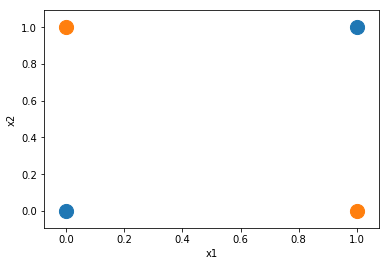

In [2]:
class_A = np.array([[0,0], [1,1]])
class_B = np.array([[0,1], [1,0]])

X = np.append(class_A, class_B, axis=0)
Y = np.expand_dims(np.array([0,0,1,1]), axis=-1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(class_A[:,0], class_A[:,1], s=200)
ax.scatter(class_B[:,0], class_B[:,1], s=200)
ax.set_ylabel('x2')
ax.set_xlabel('x1')

## Adicionando uma camada escondida

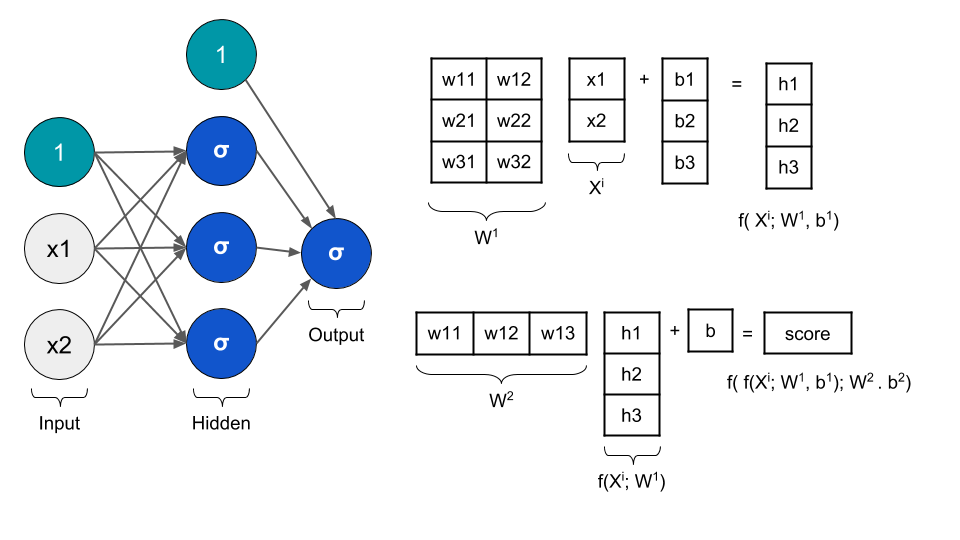

In [3]:
from IPython.display import Image
Image(filename='figs/2-layer-wbias.png')

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

In [5]:
class NeuralNetwork:
    def __init__(self, x, y, num_units = 3):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],num_units) 
        self.bias1      = np.random.rand(1, num_units)
        self.weights2   = np.random.rand(num_units,1)
        self.bias2      = np.random.random()
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.error      = np.zeros(self.y.shape)

    def forward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)  + self.bias1)
        self.output = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)

    def backprop(self):
        self.error = abs(self.y - self.output)
        # Layer 2
        delta2 = 2*(self.y - self.output) * sigmoid_derivative(self.output)
        d_weights2 = np.dot(self.layer1.T, delta2)
        d_bias2    = np.sum(delta2)
        # Layer 1
        delta1     = np.dot(delta2, self.weights2.T) * sigmoid_derivative(self.layer1)
        d_weights1 = np.dot(self.input.T,  delta1)
        d_bias1    = np.sum(delta1)
        
        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
        self.bias1    += d_bias1
        self.bias2    += d_bias2
    
    def predict(self, x):
        self.input = x
        self.forward()
        return self.output

In [6]:
nn = NeuralNetwork(X, Y) 
all_error = []
for i in range(1000):
    nn.forward()
    nn.backprop()
    all_error.append(np.squeeze(nn.error))


table = np.append(Y, nn.predict(X), axis=1)
print table

[[ 0.          0.03537552]
 [ 0.          0.04404282]
 [ 1.          0.96332444]
 [ 1.          0.96355741]]


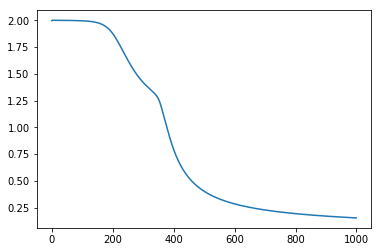

In [7]:
plt.plot(range(len(all_error)), np.sum(all_error, axis=1) )

### Intuição por trás da solução do problema do XOR

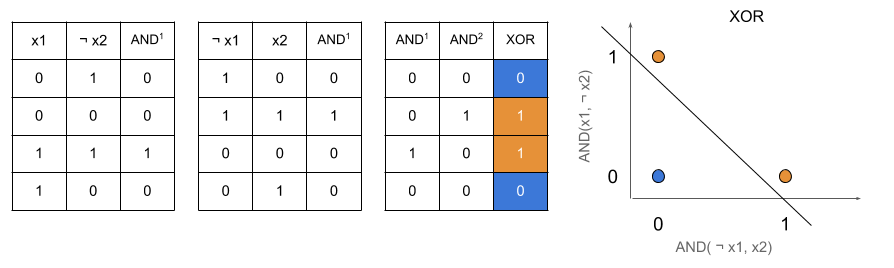

In [8]:
Image(filename='figs/xor-solved.png')